# Predicting *IMDB Movies Ratings* Using R

IMDB 5000 Movie Dataset: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

In [1]:
library(plyr) # Tools for Splitting, Applying and Combining Data
library(ggplot2) # Create Elegant Data Visualisations Using the Grammar of Graphics
install.packages("pastecs")
library(pastecs) # Package for Analysis of Space-Time Ecological Series

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: boot


In [2]:
movies <- read.csv("movie_metadata.csv", header = TRUE)
movies <- as.data.frame(movies)

In [3]:
head(movies)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,,,,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


In [4]:
df_movies <- data.frame(movies$imdb_score, movies$budget, movies$num_critic_for_reviews, movies$num_user_for_reviews, movies$facenumber_in_poster)

In [5]:
options(digits=1, scipen=100)

In [6]:
stat.desc(stat.desc(df_movies, basic=F))

,movies.imdb_score,movies.budget,movies.num_critic_for_reviews,movies.num_user_for_reviews,movies.facenumber_in_poster
nbr.val,7.00,7,7.0,7,7.00
nbr.null,0.00,0,0.0,0,0.00
nbr.na,0.00,0,0.0,0,0.00
min,0.02,5,0.9,1,0.03
max,6.60,42483351362512432,14787.0,142871,4.05
range,6.58,42483351362512424,14786.1,142870,4.03
sum,15.65,42483351637425168,15164.7,143695,9.99
median,1.13,20000000,110.0,156,1.37
mean,2.24,6069050233917882,2166.4,20528,1.43
SE.mean,1.12,6069050188099091,2103.6,20391,0.52


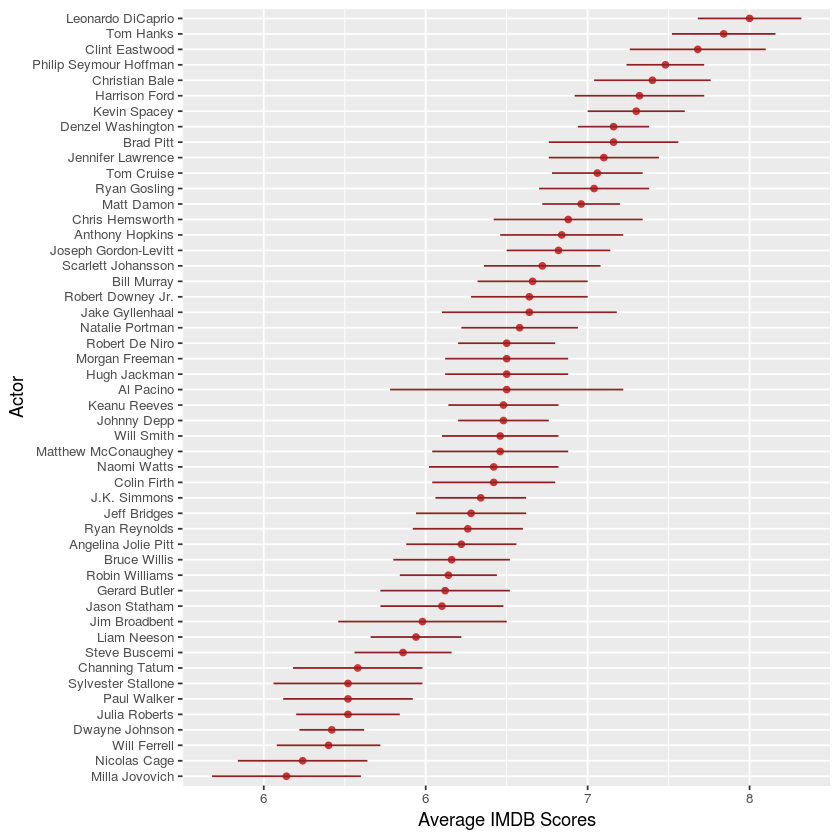

In [7]:
# Who are the best rated actors?
actorRating <- ddply(movies, c("actor_1_name"), summarise, Mean = round(mean(imdb_score, na.rm = TRUE),2), StandardError = round(sd(imdb_score, na.rm = TRUE)/sqrt(length(na.omit(imdb_score))),2), Size = length(na.omit(imdb_score)))
actorRating <- actorRating[which(actorRating$Size>=15),]
actorRating$actor_1_name <- factor(actorRating$actor_1_name)
actorRating$actor_1_name <- reorder(actorRating$actor_1_name, actorRating$Mean)
ggplot(actorRating,aes(x = Mean, xmin = Mean - StandardError, xmax = Mean + StandardError, y = actor_1_name)) + geom_point(color = "brown3") + geom_segment(aes(x = Mean - StandardError, xend = Mean + StandardError, y = actor_1_name, yend = actor_1_name), color = "brown4") + theme(axis.text = element_text(size=8)) + xlab("Average IMDB Scores") + ylab("Actor") 

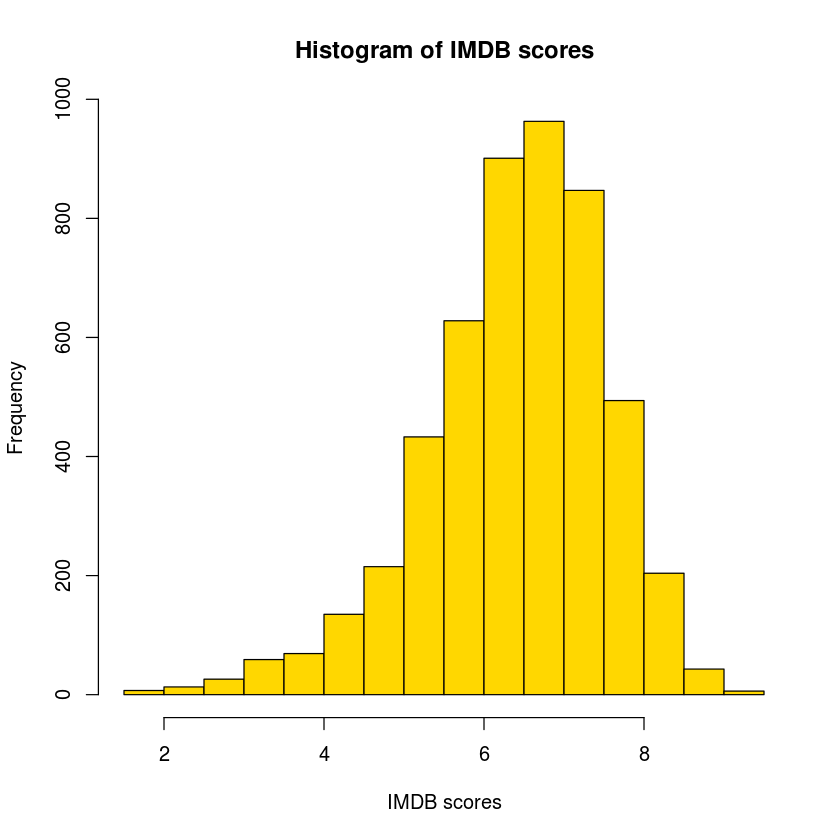

In [8]:
hist(movies$imdb_score, col = "gold", main = "Histogram of IMDB scores", xlab = "IMDB scores")

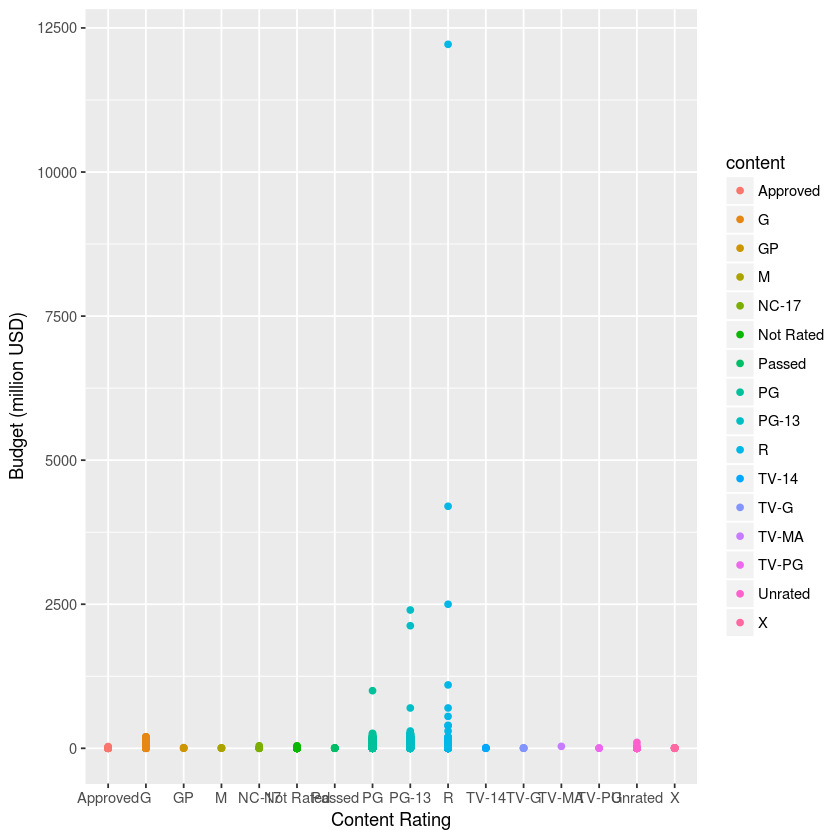

In [9]:
# Is there any correlation between content rating and movie budget?
contentVSbudget <- data.frame(movies$content_rating, movies$budget)
contentVSbudget <- na.omit(contentVSbudget)
contentVSbudget[2] <- contentVSbudget[2]/1000000
names(contentVSbudget) <- c("content", "budget")
contentVSbudget <- contentVSbudget[!(contentVSbudget$content == ""),]
ggplot(contentVSbudget, aes(x=content, y=budget, color=content)) + geom_point() + xlab("Content Rating") + ylab("Budget (million USD)") 

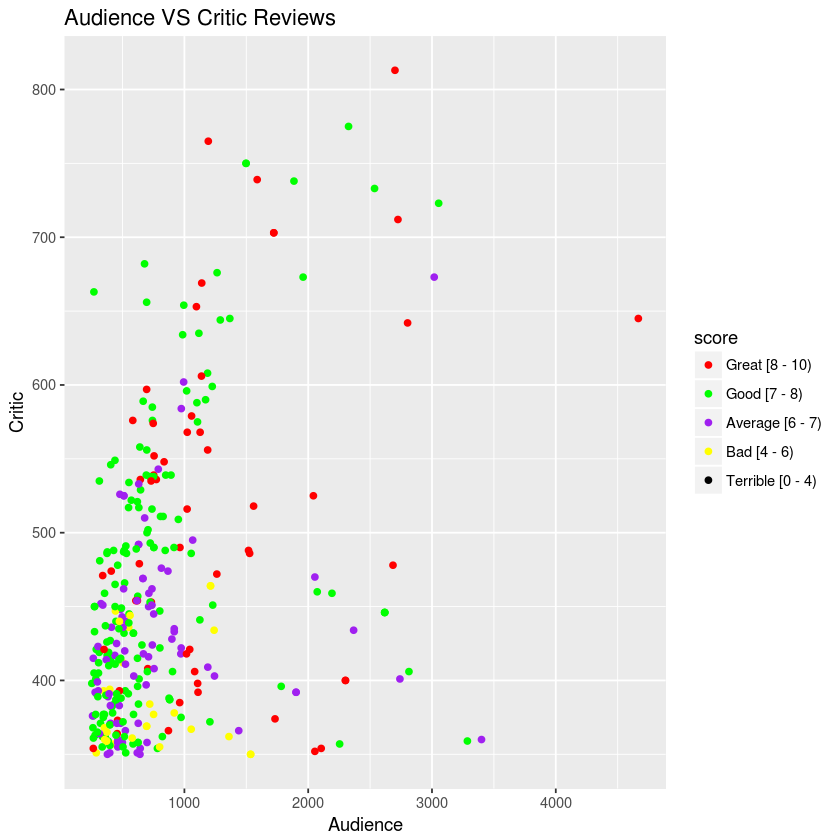

In [10]:
# Do critics and audiences agree?
userVScritic <- data.frame(movies$num_user_for_reviews, movies$num_critic_for_reviews, movies$imdb_score)
names(userVScritic) <- c("audience", "critic", "score")
userVScritic <- na.omit(userVScritic)
userVScritic <- userVScritic[which(userVScritic$audience>=250 & userVScritic$critic>=350),]
userVScritic$score[userVScritic$score >= 8 & userVScritic$score < 10] <- "Great [8 - 10)"
userVScritic$score[userVScritic$score >= 7 & userVScritic$score < 8] <- "Good [7 - 8)"
userVScritic$score[userVScritic$score >= 6 & userVScritic$score < 7] <- "Average [6 - 7)"
userVScritic$score[userVScritic$score >= 4 & userVScritic$score < 6] <- "Bad [4 - 6)"
userVScritic$score[userVScritic$score >= 0 & userVScritic$score < 4] <- "Terrible [0 - 4)"
ggplot(userVScritic, aes(x=audience, y=critic, color=score)) + geom_point() + xlab("Audience") + ylab("Critic") + ggtitle("Audience VS Critic Reviews") + scale_color_manual(limits=c("Great [8 - 10)","Good [7 - 8)","Average [6 - 7)","Bad [4 - 6)","Terrible [0 - 4)"), values=c("red","green","purple","yellow","black"))

### *To Be Continued...*